<a href="https://colab.research.google.com/github/VictoriaGranja/ml-concessao-de-credito/blob/main/trabalho_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report



In [26]:
banco = pd.read_csv("bankloan.csv")
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [27]:
banco.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [28]:
#dimensão
banco.shape

(5000, 14)

In [29]:
banco.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
banco.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
banco = banco.drop(columns=["ID"])
banco.columns

Index(['Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
banco_norm = (banco-banco.min())/(banco.max()-banco.min())

In [33]:
banco_norm = banco_norm.rename(columns={'Personal.Loan': 'Personal_Loan', 'ZIP.Code': 'ZIP_Code', 'Securities.Account': 'Securities_Account', 'CD.Account': 'CD_Account'})

In [34]:
banco_norm.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
x = banco_norm.drop('Personal_Loan', axis=1)
y = banco_norm.Personal_Loan

xTreino, xTeste, yTreino, yTeste = train_test_split(x, y, train_size=0.8)

In [36]:
print(f'Dimensões: {xTreino.shape, xTeste.shape, yTreino.shape, yTeste.shape}\n')

Dimensões: ((4000, 12), (1000, 12), (4000,), (1000,))



In [37]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [38]:
for nome, model in classifiers.items():
    model.fit(xTreino, yTreino)
    prediction_rf = model.predict(xTeste)

    print('---' * 20)
    print('Modelo: ', nome)
    print('Resultados')
    print(f"accuracy:  {model.score(xTeste, yTeste)}")
    print(f"precision: {precision_score(yTeste, prediction_rf)}")
    print(f"recall:    {recall_score(yTeste, prediction_rf)}")
    print(f"f1:        {f1_score(yTeste, prediction_rf)}")
    print('---' * 20)


------------------------------------------------------------
Modelo:  LogisiticRegression
Resultados
accuracy:  0.949
precision: 0.8928571428571429
recall:    0.5263157894736842
f1:        0.662251655629139
------------------------------------------------------------
------------------------------------------------------------
Modelo:  KNearest
Resultados
accuracy:  0.958
precision: 0.9206349206349206
recall:    0.6105263157894737
f1:        0.7341772151898734
------------------------------------------------------------
------------------------------------------------------------
Modelo:  DecisionTreeClassifier
Resultados
accuracy:  0.976
precision: 0.8901098901098901
recall:    0.8526315789473684
f1:        0.8709677419354839
------------------------------------------------------------
------------------------------------------------------------
Modelo:  Random Forest
Resultados
accuracy:  0.982
precision: 0.9873417721518988
recall:    0.8210526315789474
f1:        0.896551724137931
-

In [60]:
modelo = LogisticRegression()

modelo.fit(xTreino, yTreino)
prediction_rf = modelo.predict(xTeste)

print('---' * 20)
print('Modelo: Regressão logística')
print('Resultados')
print(f"accuracy:  {modelo.score(xTeste, yTeste)}")
print(f"precision: {precision_score(yTeste, prediction_rf)}")
print(f"recall:    {recall_score(yTeste, prediction_rf)}")
print(f"f1:        {f1_score(yTeste, prediction_rf)}")
print('---' * 20)



------------------------------------------------------------
Modelo: Regressão logística
Resultados
accuracy:  0.949
precision: 0.8928571428571429
recall:    0.5263157894736842
f1:        0.662251655629139
------------------------------------------------------------


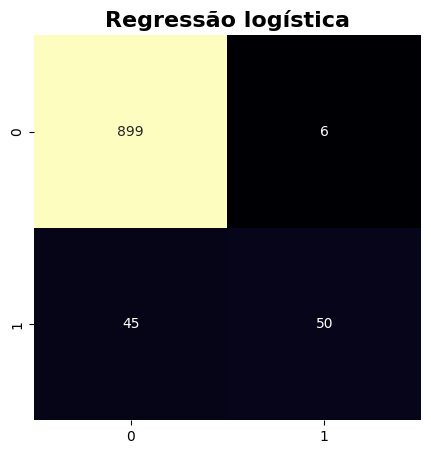

In [61]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(yTeste, prediction_rf), annot=True, cmap=plt.cm.magma, fmt='g', cbar=False)
plt.title("Regressão logística", fontsize=16, fontweight='bold')
plt.show()


In [62]:
#HIPERPARÂMETROS PARA KNearest

# numero de vizinhos
n_neighbors = [3, 5, 7, 9]

# distancias
p = [1, 2]

leaf_size = [10, 30, 50, 100, 500]

# colocando os parametros definidos em um dicionário
random_grid = {'n_neighbors': n_neighbors,
               'p': p,
               'leaf_size': leaf_size}

# exibindo os parâmetros
print(random_grid)


{'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'leaf_size': [10, 30, 50, 100, 500]}


In [63]:
rf_grid = RandomizedSearchCV(KNeighborsClassifier(), random_grid, n_iter=5, random_state=42)

rf_grid.fit(xTreino, yTreino)
prediction_rf = rf_grid.predict(xTeste)

print('---' * 20)
print('Modelo: KNearest')
print('Resultados')
print(f"accuracy:  {rf_grid.score(xTeste, yTeste)}")
print(f"precision: {precision_score(yTeste, prediction_rf)}")
print(f"recall:    {recall_score(yTeste, prediction_rf)}")
print(f"f1:        {f1_score(yTeste, prediction_rf)}")
print('---' * 20)

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")


------------------------------------------------------------
Modelo: KNearest
Resultados
accuracy:  0.958
precision: 0.9206349206349206
recall:    0.6105263157894737
f1:        0.7341772151898734
------------------------------------------------------------
------------------------------------------------------------
melhores estimadores para RF: {'p': 2, 'n_neighbors': 5, 'leaf_size': 50}


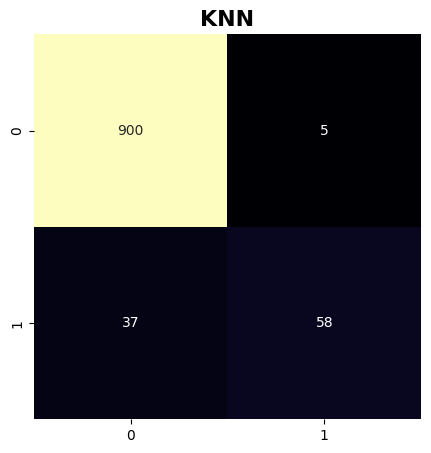

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(yTeste, prediction_rf), annot=True, cmap=plt.cm.magma, fmt='g', cbar=False)
plt.title("KNN", fontsize=16, fontweight='bold')
plt.show()


In [65]:
#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
print(random_grid)


{'n_estimators': [3, 5, 10, 100], 'max_features': [3, 4, 5, 6, None], 'max_depth': [3, 4, 5, 6, None], 'class_weight': ['balanced', None]}


In [66]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter=5, random_state=42)

rf_grid.fit(xTreino, yTreino)
prediction_rf = rf_grid.predict(xTeste)

print('---' * 20)
print('Modelo: Radom forest')
print('Resultados')
print(f"accuracy:  {rf_grid.score(xTeste, yTeste)}")
print(f"precision: {precision_score(yTeste, prediction_rf)}")
print(f"recall:    {recall_score(yTeste, prediction_rf)}")
print(f"f1:        {f1_score(yTeste, prediction_rf)}")
print('---' * 20)

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")


------------------------------------------------------------
Modelo: Radom forest
Resultados
accuracy:  0.979
precision: 0.9404761904761905
recall:    0.8315789473684211
f1:        0.88268156424581
------------------------------------------------------------
------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}


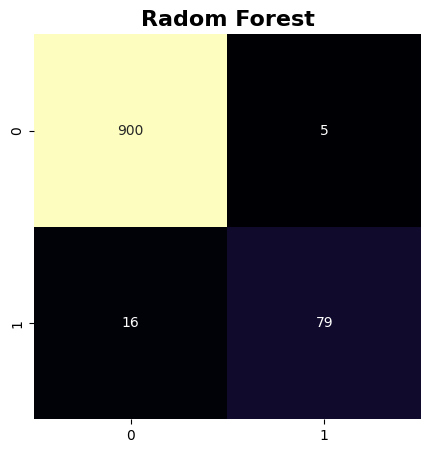

In [67]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(yTeste, prediction_rf), annot=True, cmap=plt.cm.magma, fmt='g', cbar=False)
plt.title("Radom Forest", fontsize=16, fontweight='bold')
plt.show()


In [69]:
#HIPERPARÂMETROS PARA DecisionTreeClassifier

# número de árvores
criterion = ["gini", "entropy", "log_loss"]

# número de features para considerar em cada split
max_features = [5,10,12,None]

# número máximo de níveis da árvore
max_depth = [10,20,30,50,100,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# exibindo os parâmetros
print(random_grid)


{'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': [5, 10, 12, None], 'max_depth': [10, 20, 30, 50, 100, None], 'class_weight': ['balanced', None]}


In [71]:
rf_grid = RandomizedSearchCV(DecisionTreeClassifier(), random_grid, n_iter=5, random_state=42)

rf_grid.fit(xTreino, yTreino)
prediction_rf = rf_grid.predict(xTeste)

print('---' * 20)
print('Modelo: DecisionTreeClassifier')
print('Resultados')
print(f"accuracy:  {rf_grid.score(xTeste, yTeste)}")
print(f"precision: {precision_score(yTeste, prediction_rf)}")
print(f"recall:    {recall_score(yTeste, prediction_rf)}")
print(f"f1:        {f1_score(yTeste, prediction_rf)}")
print('---' * 20)

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")



------------------------------------------------------------
Modelo: DecisionTreeClassifier
Resultados
accuracy:  0.977
precision: 0.9
recall:    0.8526315789473684
f1:        0.8756756756756757
------------------------------------------------------------
------------------------------------------------------------
melhores estimadores para RF: {'max_features': 10, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}


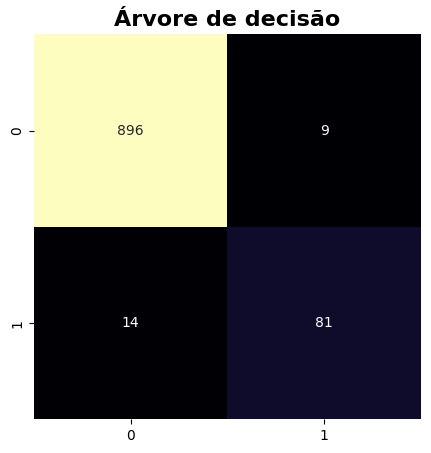

In [72]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(yTeste, prediction_rf), annot=True, cmap=plt.cm.magma, fmt='g', cbar=False)
plt.title("Árvore de decisão", fontsize=16, fontweight='bold')
plt.show()
